# ¡Hola Diana! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Diana completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de visualización de datos y un buen dominio en la prueba de hipótesis, lo cual fortalece el análisis de los datos con los que has trabajado. Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

----------

# Análisis exploratorio en Python

Importación de archivos.

In [16]:
import pandas as pd

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

Exploración inicial de datos.

In [17]:
# Información general
print(df_companies.info())
print(df_locations.info())

# Primeras filas
print(df_companies.head())
print(df_locations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_loca

Verifiación de que trips_amount y average_trips estén como int o float.

In [18]:
# Verificación adicional
print(df_companies.dtypes)
print(df_locations.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `dtypes` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

Top 10 barrios por viajes finalizados.

In [19]:
top10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print(top10_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Número de viajes por empresa

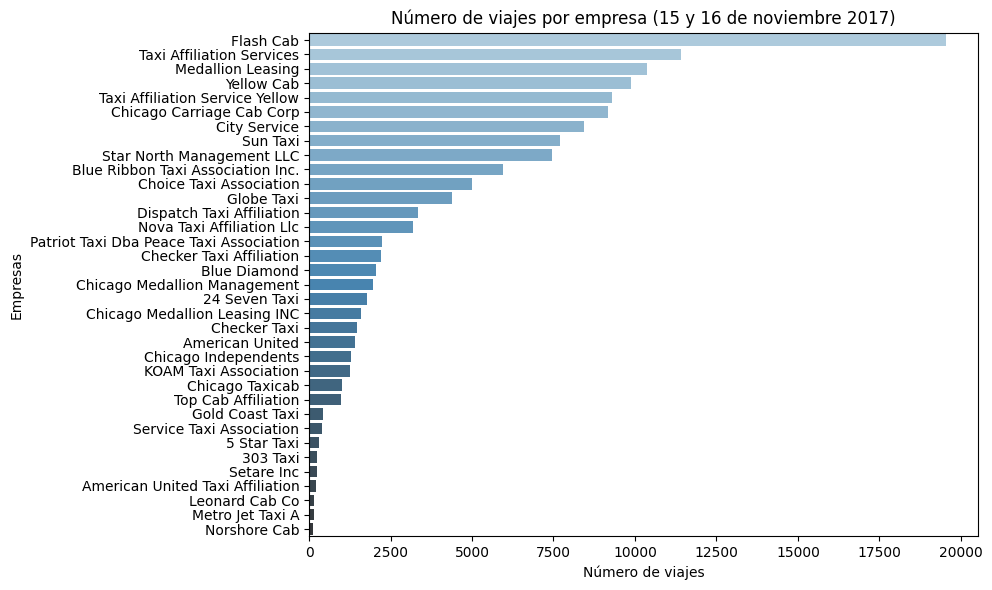

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    y='company_name',
    x='trips_amount',
    data=df_companies.sort_values('trips_amount', ascending=False).head(35),
    palette='Blues_d'
)
plt.title('Número de viajes por empresa (15 y 16 de noviembre 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresas')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se ve claramente que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

Flash Cab lidera el mercado, seguido por Taxi Affiliation Services.

Hay un marcado descenso después del Top 5; las empresas a partir de la sexta posición presentan menos de 5,000 viajes.

El mercado está concentrado en unas pocas empresas grandes, con una larga cola de operadores pequeños o independientes. Esto podría influir en decisiones estratégicas como alianzas o enfoque de marketing.

### Top 10 barrios por finalización de viajes

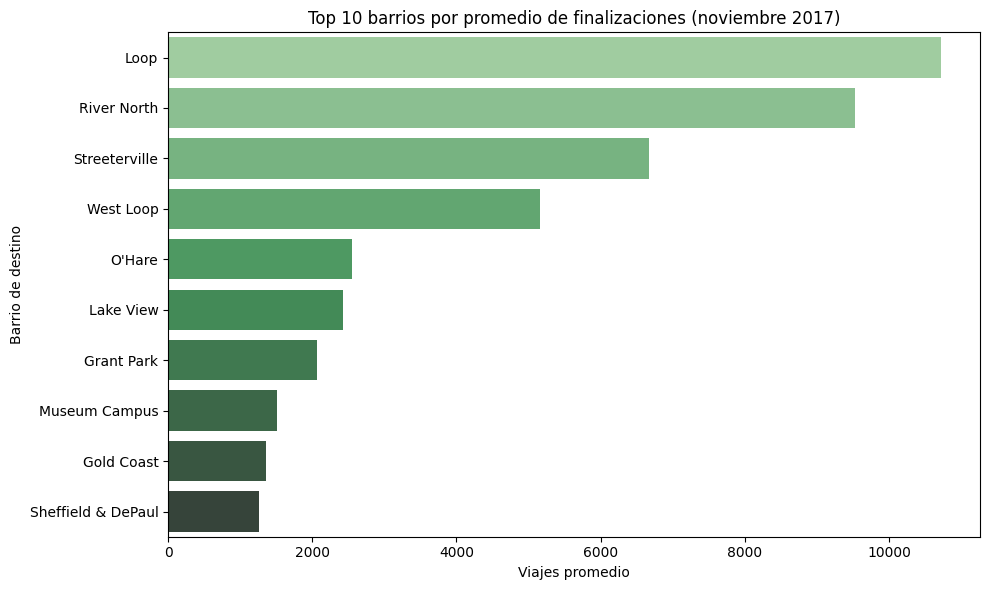

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    y='dropoff_location_name',
    x='average_trips',
    data=top10_locations,
    palette='Greens_d'
)
plt.title('Top 10 barrios por promedio de finalizaciones (noviembre 2017)')
plt.xlabel('Viajes promedio')
plt.ylabel('Barrio de destino')
plt.tight_layout()
plt.show()

Las zonas centrales y de actividad económica como Loop, River North y Streeterville son los principales destinos.


## Conclusiones

Empresas de taxi: Pocas empresas dominan la mayoría de los viajes, lo que indica una concentración del mercado.

Barrios destino: Algunas zonas tienen consistentemente más tráfico, lo que podría deberse a zonas comerciales, estaciones de transporte o aeropuertos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.
</div>

# Prueba de hipótesis en Python

 Importar y revisar

In [22]:
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Revisión inicial
print(df_trips.info())
print(df_trips['weather_conditions'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
Good    888
Bad     180
Name: weather_conditions, dtype: int64


Separar en dos grupos

In [23]:
good_weather = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']

### Formulación de hipótesis
H0 (nula): La duración promedio de los viajes los sábados no cambia entre clima bueno y lluvioso.

H1 (alternativa): La duración promedio de los viajes los sábados cambia cuando llueve.

### Selección del criterio de prueba
Dado que:

1. Las muestras pueden no tener distribución normal.

2. La muestra no es necesariamente grande.

Se aplica la prueba no paramétrica de Mann-Whitney U (distribuciones independientes, no normales).

In [24]:
from scipy.stats import mannwhitneyu

alpha = 0.05

stat, p = mannwhitneyu(good_weather, bad_weather, alternative='two-sided')

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p}')

if p < alpha:
    print("Rechazamos H₀: La duración promedio **sí cambia** en sábados lluviosos.")
else:
    print("No se puede rechazar H₀: No hay evidencia de diferencia significativa.")

Estadístico de prueba: 51646.5
Valor p: 6.716538885593458e-14
Rechazamos H₀: La duración promedio **sí cambia** en sábados lluviosos.


El resultado indica que se tiene evidencia estadística suficiente para rechazar la hipótesis nula (H0). Esto implica que la duración promedio no cambia en sábados lluviosos. Al rechazarla, se concluye que la duración promedio sí cambia en esos días.

El valor p tan bajo indica que la probabilidad de obtener un resultado igual o más extremo que este, bajo la suposición de que la hipótesis nula es verdadera, es prácticamente cero. Por tanto, la diferencia observada en la duración promedio en sábados lluviosos es estadísticamente significativa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has hecho un análisis muy claro y bien fundamentado. Elegiste correctamente la prueba no paramétrica de Mann-Whitney U al asumir que las muestras pueden no ser normales y que el tamaño no es grande. El planteamiento de hipótesis está claramente redactado, y la interpretación del valor p es precisa.

</div>